Ac/As = Pi*r^2 
    = Pi/4
    
confidence_interval_95 = Mean +- 1.96 * (std/sqrt(m))  
np.mean(pi_list)

In [19]:
import random 
import pandas as pd
import seaborn as sn 
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import statistics
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
from scipy.stats import norm

In [20]:
#Problem 1
x = random.uniform(-1,1)
y = random.uniform(-1,1)
print(f"the value of x is {x}")
print(f"the value of y is {y}")
print(x,y)

the value of x is 0.6949913110629646
the value of y is -0.9478477940950509
0.6949913110629646 -0.9478477940950509


In [21]:
distance = x**2 + y**2
print(f"The distance is the sum of x squared and y squared is {distance}")

The distance is the sum of x squared and y squared is 1.3814283632238726


In [22]:
count = 0 
n = 10000
m = 500
pi_list = []

for j in range(m):
    count = 0 
    
    for i in range(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        distance = np.sqrt(x**2 + y**2)
        if distance <= 1:
            count = count + 1

    count_of_circle = count
    count_of_square = n
    ratio = count_of_circle/count_of_square
    estimate = ratio*4
    pi_list.append(estimate)
    
std = np.std(pi_list)    
print(f"Pi estimate is {estimate} with a standard deviation of {np.std(pi_list)}")
c_plus = np.mean(pi_list) + 1.96 * (std/np.sqrt(m))
c_minus = np.mean(pi_list) - 1.96 * (std/np.sqrt(m))  
c_interval = [c_minus,c_plus]
print(f"Confidence Interval is {c_interval}")

Pi estimate is 3.1168 with a standard deviation of 0.01670038158126934
Confidence Interval is [3.141560947012137, 3.1444886529878633]


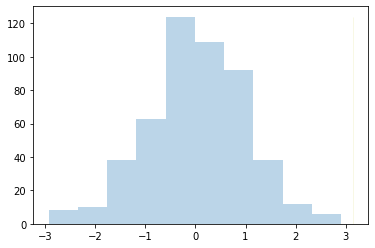

In [23]:
m_sample = np.random.normal(size=500)
confidence_interval = norm(*norm.fit(c_interval)).interval(0.95)  
height, bins, patches = plt.hist(m_sample, alpha=0.3)
plt.fill_betweenx([0, height.max()], confidence_interval[0], confidence_interval[1], color='y', alpha=0.1)  

In [24]:
count = 0 
n = 500
m = 500
pi_list = []

for j in range(m):
    count = 0 
    
    for i in range(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        distance = np.sqrt(x**2 + y**2)
        if distance <= 1:
            count = count + 1

    count_of_circle = count
    count_of_square = n
    ratio = count_of_circle/count_of_square
    estimate = ratio*4
    pi_list.append(estimate)
    
std = np.std(pi_list)    
print(f"Pi estimate is {estimate} with a standard deviation of {np.std(pi_list)}")
c_plus = np.mean(pi_list) + 1.96 * (std/np.sqrt(m))
c_minus = np.mean(pi_list) - 1.96 * (std/np.sqrt(m))  
c_interval = [c_minus,c_plus]
print(f"Confidence Interval is {c_interval}")

Pi estimate is 3.08 with a standard deviation of 0.07195293750779046
Confidence Interval is [3.1471650469496297, 3.15977895305037]


In [25]:
def knapsack(RS, weight, value, n):
   
   if n == 0 or RS == 0 :
      return 0
  
   if (weight[n-1] > RS):
      return knapsack(RS, weight, value, n-1)
   
   else:
      return max(value[n-1] + knapsack(RS-weight[n-1], weight, value, n-1),
         knapsack(RS, weight, value, n-1))

value = [12,16,22,8] #objective function 
weight = [4,5,7,3] #constraints
RS = 14 #right-hand side
n = len(value)
print (f'the objective value is {knapsack(RS, weight, value, n)}')

the objective value is 42


In [26]:
x1 = LpVariable("BR", 0, 1, cat = 'Integer')
x2 = LpVariable("DR", 0, 1, cat = 'Integer')
x3 = LpVariable("GC", 0, 1, cat = 'Integer')
x4 = LpVariable("Sofa", 0, 1, cat = 'Integer')


prob = LpProblem("problem", LpMaximize)

#constraints
prob += 4*x1 + 5*x2 + 7*x3 + 3*x4 <= 14

#objective function
prob += 12*x1 + 16*x2 + 22*x3 + 8*x4

def simulation(objective, parameters, iterations, step_size, temperature):
    
    start = parameters[:, 0] + rand( len( parameters ) ) * ( parameters[:, 1] - parameters[:, 0] )
    
    start_calc = objective(start)
   
    assign_start, assign_calc = start, start_calc
    outputs = []
    for i in range(iterations):
        
        assign_step = assign_start + randn( len( parameters ) ) * step_size  
        assign_calc = objective(assign_start)
        if assign_step < assign_calc:
            start, start_calc = assign_start, assign_calc
      
            outputs.append(assign_calc)
            print('Acceptance Criteria = %.2f' % metropolis," ",'iteration number = ',i," ", 'optimizing = ',start," " ,'optimal = %.2f' % assign_calc)
        difference = assign_step - assign_calc
        t = temperature / float(i + 1)
       
        metropolis = exp(-difference / t)
        
        if difference < 0 or rand() < metropolis:
            assign_start_point, assign_start_calc = assign_step, assign_calc
    return [start, start_calc, outputs]